In [3]:
import pandas as pd
import seaborn as sb

Dataframe characteristic

- Shape: (768, 9)

- Columns: (['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- dtypes: int64, float64

- NULL: 0

- Target feature: 'Outcome'

- Insulin has the highest outlier value


In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
for i in df.columns:
    print(i, df[i].unique())

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

Checking outlier in data

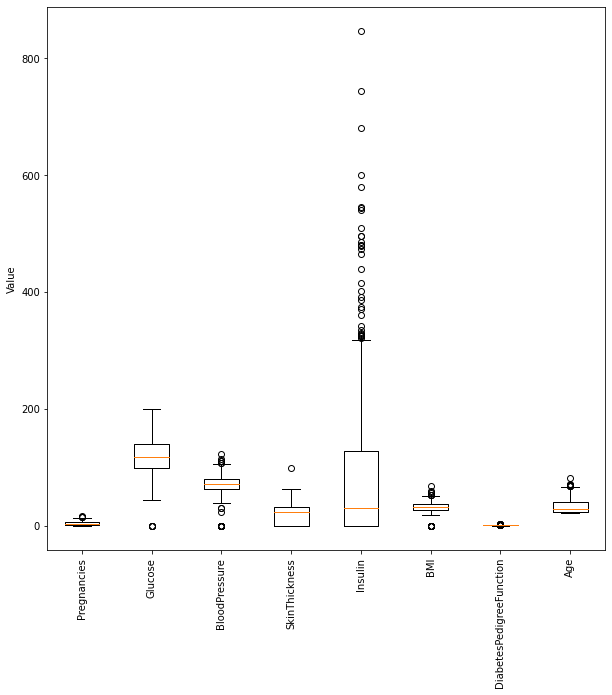

In [7]:
import matplotlib.pyplot as plt

x_feature = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)


ax.boxplot(x_feature)
ax.set_xticklabels(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                     'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.show()


In [8]:
# checking Insulin outlier value
import numpy as np
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['Insulin'])

Outliers: [543, 846, 495, 485, 495, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 480, 510]


In [60]:
insulin_outlier = df.loc[df['Insulin'].isin([543, 846, 495, 485, 495, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 480, 510])] 
insulin_group = insulin_outlier.groupby(df['Outcome'])
insulin_group.groups

{0: [153, 228, 247, 286, 486, 645], 1: [8, 13, 111, 186, 220, 370, 409, 415, 584, 655, 695, 753]}

# Preprocessing

- Sincee this data has no categorical value, hence no encoder used.

Checking correlation between variable

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Heatmap correlation between feature

- The highest correlation is between age and pregnancies
- Does not influence the modelling

<AxesSubplot:>

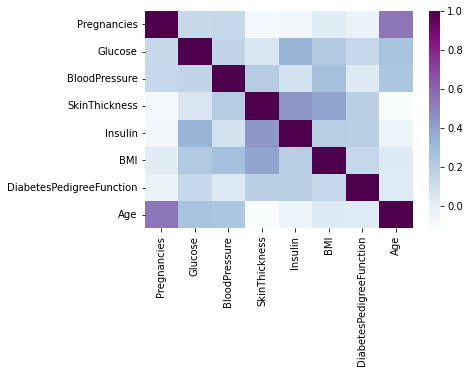

In [10]:

x_feature = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
sb.heatmap(x_feature.corr(), cmap="BuPu")

# Modelling

Scaling the x feature

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.drop('Outcome', axis=1)

X_scale = scaler.fit_transform(X)

y = df['Outcome']
#y_scale = scaler.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,  y_test = train_test_split(X_scale, y, random_state=42, test_size=0.2, stratify=y)

In [13]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [14]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2)

knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

# test performance
# y-train
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_train_matthew = matthews_corrcoef(y_train, y_train_pred)
knn_train_f1 = f1_score(y_train, y_train_pred)

# y-test
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_test_matthew = matthews_corrcoef(y_test, y_test_pred)
knn_test_f1 = f1_score(y_test, y_test_pred)

print("Train performance: \n")
print(f"Accuracy : {round(knn_train_accuracy, 2)}")
print(f"MCC : {round(knn_train_matthew, 2)}")
print(f"F1 : {round(knn_train_f1,2)}")

print("\nTest performance: \n")
print(f"Accuracy : {round(knn_test_accuracy, 2)}")
print(f"MCC : {round(knn_test_matthew, 2)}")
print(f"F1 : {round(knn_test_f1,2)}")

Train performance: 

Accuracy : 0.86
MCC : 0.69
F1 : 0.74

Test performance: 

Accuracy : 0.68
MCC : 0.24
F1 : 0.38


In [16]:
# gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = [{'C':[0.5, 1, 10, 100],
                'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                'kernel':['rbf']
                },
            ]

optimal_param = GridSearchCV(
                SVC(), 
                param_grid,
                cv = 5,
                scoring = 'accuracy',
                )

optimal_param.fit(X_train, y_train)

print(optimal_param.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [17]:
from sklearn.svm import SVC

svm = SVC(C=100, gamma=0.01, kernel='rbf')

svm.fit(X_train, y_train)

y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

#train
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_train_matthew = matthews_corrcoef(y_train, y_train_pred_svm)
svm_train_f1 = f1_score(y_train, y_train_pred_svm)

#test
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_test_matthew = matthews_corrcoef(y_test, y_test_pred_svm)
svm_test_f1 = f1_score(y_test, y_test_pred_svm)

print("Train performance: \n")
print(f"Accuracy : {round(svm_train_accuracy, 2)}")
print(f"MCC : {round(svm_train_matthew, 2)}")
print(f"F1 : {round(svm_train_f1,2)}")

print("\nTest performance: \n")
print(f"Accuracy : {round(svm_test_accuracy, 2)}")
print(f"MCC : {round(svm_test_matthew, 2)}")
print(f"F1 : {round(svm_test_f1,2)}")


Train performance: 

Accuracy : 0.78
MCC : 0.48
F1 : 0.63

Test performance: 

Accuracy : 0.77
MCC : 0.49
F1 : 0.67


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

#train
dt_train_accuracy = accuracy_score(y_train, y_train_pred_dt)
dt_train_matthew = matthews_corrcoef(y_train, y_train_pred_dt)
dt_train_f1 = f1_score(y_train, y_train_pred_dt)

#test
dt_test_accuracy = accuracy_score(y_test,y_test_pred_dt)
dt_test_matthew = matthews_corrcoef(y_test, y_test_pred_dt)
dt_test_f1 = f1_score(y_test, y_test_pred_dt)

print("Train performance: \n")
print(f"Accuracy : {round(dt_train_accuracy, 2)}")
print(f"MCC : {round(dt_train_matthew, 2)}")
print(f"F1 : {round(dt_train_f1,2)}")

print("\nTest performance: \n")
print(f"Accuracy : {round(dt_test_accuracy, 2)}")
print(f"MCC : {round(dt_test_matthew, 2)}")
print(f"F1 : {round(dt_test_f1,2)}")


Train performance: 

Accuracy : 1.0
MCC : 1.0
F1 : 1.0

Test performance: 

Accuracy : 0.76
MCC : 0.49
F1 : 0.68


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

#train
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_train_matthew = matthews_corrcoef(y_train, y_train_pred_rf)
rf_train_f1 = f1_score(y_train, y_train_pred_rf)

#test
rf_test_accuracy = accuracy_score(y_test,y_test_pred_rf)
rf_test_matthew = matthews_corrcoef(y_test, y_test_pred_rf)
rf_test_f1 = f1_score(y_test, y_test_pred_rf)

print("Train performance: \n")
print(f"Accuracy : {round(rf_train_accuracy, 2)}")
print(f"MCC : {round(rf_train_matthew, 2)}")
print(f"F1 : {round(rf_train_f1,2)}")

print("\nTest performance: \n")
print(f"Accuracy : {round(rf_test_accuracy, 2)}")
print(f"MCC : {round(rf_test_matthew, 2)}")
print(f"F1 : {round(rf_test_f1,2)}")


Train performance: 

Accuracy : 0.99
MCC : 0.97
F1 : 0.98

Test performance: 

Accuracy : 0.69
MCC : 0.33
F1 : 0.57


# Build Stack Model


In [20]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
#stk = StackingClassifier()
estimators_list = [

    ('knn', knn), 
    ('svm', svm),
    ('dt', dt),
    ('rf', rf)

]

stack_model = StackingClassifier(
    estimators=estimators_list, final_estimator=LogisticRegression()
)

stack_model.fit(X_train, y_train)

# predict
y_train_pred_stk = stack_model.predict(X_train)
y_test_pred_stk = stack_model.predict(X_test)

#train
stk_train_accuracy = accuracy_score(y_train, y_train_pred_stk)
stk_train_matthew = matthews_corrcoef(y_train, y_train_pred_stk)
stk_train_f1 = f1_score(y_train, y_train_pred_stk)

#test
stk_test_accuracy = accuracy_score(y_test,y_test_pred_stk)
stk_test_matthew = matthews_corrcoef(y_test, y_test_pred_stk)
stk_test_f1 = f1_score(y_test, y_test_pred_stk)

print("Train performance: \n")
print(f"Accuracy : {round(stk_train_accuracy, 2)}")
print(f"MCC : {round(stk_train_matthew, 2)}")
print(f"F1 : {round(stk_train_f1,2)}")

print("\nTest performance: \n")
print(f"Accuracy : {round(stk_test_accuracy, 2)}")
print(f"MCC : {round(stk_test_matthew, 2)}")
print(f"F1 : {round(stk_test_f1,2)}")

Train performance: 

Accuracy : 0.9
MCC : 0.78
F1 : 0.85

Test performance: 

Accuracy : 0.77
MCC : 0.5
F1 : 0.67


In [22]:
acc_train_list = {
    'knn': knn_train_accuracy,
    'svm': svm_train_accuracy,
    'dt': dt_train_accuracy,
    'rf': rf_train_accuracy,
    'stack': stk_train_accuracy
}

math_train_list = {
    'knn': knn_train_matthew,
    'svm':svm_train_matthew,
    'dt': dt_train_matthew,
    'rf': rf_train_matthew,
    'stack': stk_train_matthew
}

f1_train_list = {
    'knn': knn_train_f1,
    'svm': svm_train_f1,
    'dt': dt_train_f1,
    'rf': rf_train_f1,
    'stack': stk_train_f1
}


In [23]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index',columns=['Accuracy'] )
mat_df = pd.DataFrame.from_dict(math_train_list, orient='index',columns=['Matthew'] )
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index',columns=['f1_score'] )

df_performance = pd.concat([acc_df, mat_df, f1_df], axis=1)
df_performance

,Accuracy,Matthew,f1_score
knn,0.855049,0.690232,0.735905
svm,0.775244,0.483935,0.632979
dt,1.000000,1.000000,1.000000
rf,0.988599,0.974860,0.983373
stack,0.902280,0.781603,0.852217


### Create Pipeline to predict new dataset using Stack Model 

In [24]:
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((scaler, ['Pregnancies', 'Glucose', 
                        'BloodPressure', 'SkinThickness', 'Insulin',
                        'BMI', 'DiabetesPedigreeFunction', 'Age']), remainder='passthrough')

In [25]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(column_trans, stack_model)
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('knn',
                                                 KNeighborsClassifier(n_neighbors=2)),
                                                ('svm', SVC(C=100, gamma=0.01)),
                                                ('dt',
                            

Suppose we create 'new-dataset' from the sample of the dataset,

In [26]:
X_new_sample = X.sample(n=100, random_state=42)

In [27]:
y_new_outside_predict = pipe.predict(X_new_sample)
X_new_sample['y_new_outside_predict'] = y_new_outside_predict

In [28]:
X_new_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_new_outside_predict
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
470,1,144,82,40,0,41.3,0.607,28,0
250,9,106,52,0,0,31.2,0.380,42,0
490,2,83,65,28,66,36.8,0.629,24,0
220,0,177,60,29,478,34.6,1.072,21,1
